In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read n Edit

In [2]:
df = pd.read_csv('imputed_combined_data_subset.csv')
df.head()

,id,color,plastic type,400.133331,400.508789,400.884216,401.259613,401.634949,402.010254,402.385559,...,897.136108,897.444946,897.753723,898.062439,898.371155,898.679749,898.988342,899.296814,899.605225,899.913696
0,49,Transparan,PET,60.351364,60.512665,60.626610,60.735283,60.927467,61.144253,61.224869,...,88.963318,88.568047,87.360184,85.711304,84.398033,83.330544,83.080719,82.002800,81.560013,81.482407
1,50,Trasnparan,PET,19.964344,20.043579,20.144825,20.212513,20.396099,20.504927,20.559423,...,47.218098,46.385483,45.225742,44.367702,43.060097,41.979828,40.690384,39.956558,39.300247,38.560486
2,51,Transparan,PET,16.811512,16.893469,17.011232,17.055092,17.121126,17.187664,17.169941,...,78.036636,77.393188,76.098213,74.713531,73.149994,72.379059,71.532295,70.585815,70.333099,69.396652
3,52,Putih,PET,75.843307,77.662079,79.593765,81.647659,83.815521,86.104065,88.202301,...,274.305115,272.992462,270.220642,267.294525,263.118225,260.135864,258.894653,256.679901,255.601395,255.142395
4,53,Transparan,PET,37.036633,37.331455,37.493233,37.620407,37.839821,38.025574,38.077957,...,82.184387,80.849472,79.362396,77.899857,75.991585,74.288727,73.514656,72.317429,70.758453,69.727409


In [3]:
#print all unique values in the column color
print(df['plastic type'].unique())

['PET' 'HDPE' 'LDPE' 'PS' 'PP' 'other' '_PET' '_PP']


In [4]:
#change _PET and _PP to PET and PP
df['plastic type'] = df['plastic type'].replace('_PET', 'PET')
df['plastic type'] = df['plastic type'].replace('_PP', 'PP')

In [5]:
df = df[df['plastic type'].isin(['PET', 'HDPE', 'LDPE', 'PS', 'PP'])]

In [6]:
#print all unique values in the column color
print(df['plastic type'].unique())

['PET' 'HDPE' 'LDPE' 'PS' 'PP']


In [7]:
#print all unique values in the column color
print(df['color'].unique())

['Transparan' 'Trasnparan' 'Putih' 'Abu' 'Hijau' 'Biru' 'Hitam' 'HIjau'
 'Merah' 'Kuning' 'Emas' 'Oranye' 'Ungu' 'Coklat' 'Perak']


In [8]:
# change that has value HIjau to Hijau
df['color'] = df['color'].replace('HIjau', 'Hijau')

In [9]:
# only use Hijau Biru Merah Hitam Putih Transparan
df = df[df['color'].isin(['Hijau', 'Biru', 'Merah', 'Hitam', 'Putih', 'Transparan'])]

In [10]:
print(df['color'].unique())

['Transparan' 'Putih' 'Hijau' 'Biru' 'Hitam' 'Merah']


# How Many per Plastic Type / COlor

In [11]:
# print unique values in the column plastic type and its count
print(df['plastic type'].value_counts())

plastic type
PP      51
LDPE    18
HDPE    10
PS       9
PET      8
Name: count, dtype: int64


In [12]:
# rint unique values in the column color and its count
print(df['color'].value_counts())

color
Transparan    37
Putih         24
Biru          11
Hijau         10
Merah          9
Hitam          5
Name: count, dtype: int64


In [13]:
# distribution each color in plastic type, cross tabulation
pd.crosstab(df['plastic type'], df['color'])

color,Biru,Hijau,Hitam,Merah,Putih,Transparan
plastic type,,,,,,
HDPE,0,3,1,0,5,1
LDPE,1,0,4,0,2,11
PET,0,0,0,0,1,7
PP,10,6,0,9,8,18
PS,0,1,0,0,8,0


# =====================================================================================

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_plastic_types(df, plastic_types, mean_same_type=False, ax=None):
    """
    Plot intensity (P) vs. wavelength for each plastic type in the DataFrame.
    
    Args:
    - df (pd.DataFrame): Input DataFrame containing wavelength and intensity values for different plastic types.
    - plastic_types (list): List of plastic types to plot.
    - mean_same_type (bool): Whether to calculate the mean intensity for the same plastic type.
    - ax (matplotlib.axes.Axes): Axes object to draw the plot on.
    
    Returns:
    - None (displays the plot)
    """
    if ax is None:
        ax = plt.gca()

    # Define colors for each plastic type
    plastic_colors = {
        'PET': 'blue',
        'HDPE': 'orange',
        'LDPE': 'green',
        'PS': 'red',
        'PP': 'purple',
        'other': 'brown'
    }

    # Plot each plastic type with its assigned color
    for plastic_type in plastic_types:
        if plastic_type in plastic_colors:
            # Filter rows for the current plastic type
            plastic_df = df[df['plastic type'] == plastic_type]

            # Calculate mean intensity for the same plastic type if mean_same_type is True
            if mean_same_type:
                plastic_df_mean = plastic_df.iloc[:, 3:].mean(axis=0)
                ax.plot(plastic_df.columns[3:].astype(float), plastic_df_mean, label=plastic_type, color=plastic_colors[plastic_type])
            else:
                first = True
                # Plot the line chart for each row (sample) of the plastic type with the assigned color
                for _, row in plastic_df.iterrows():
                    ax.plot(plastic_df.columns[3:].astype(float), row[3:].astype(float), label=plastic_type if first else "", color=plastic_colors[plastic_type], alpha=0.5)
                    first = False

    # Add labels and title
    ax.set_xlabel('Wavelength')
    ax.set_ylabel('Intensity (P)')
    ax.set_title('Intensity (P) vs. Wavelength')

    # Set the x-axis tick frequency and rotate labels by 90 degrees
    ax.tick_params(axis='x', rotation=90)

    # Add legend
    ax.legend()

# Hijau

In [15]:
df_hijau = df[df['color'] == 'Hijau']
# df_hijau

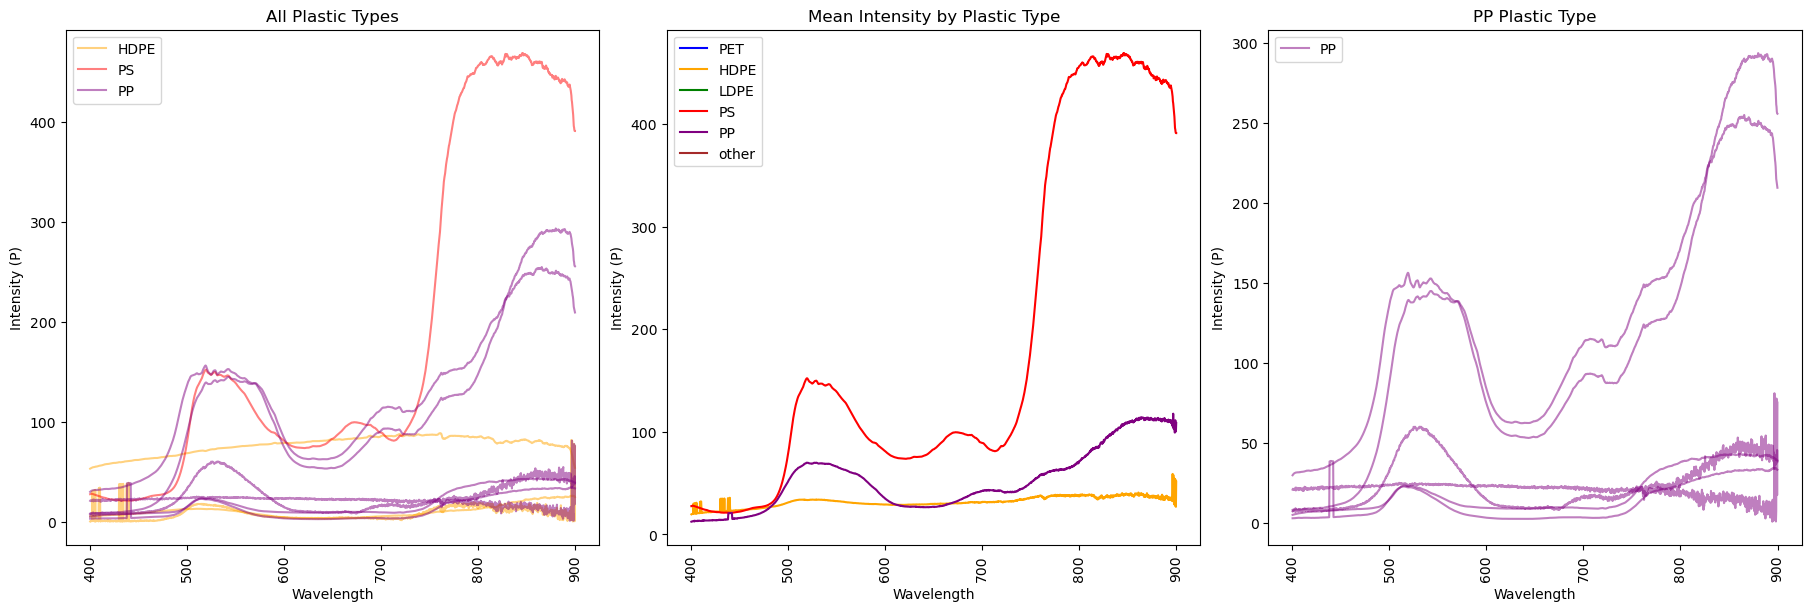

In [16]:
# Create a figure with 1 row and 3 columns of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

# Plot each scenario in a separate subplot
plot_plastic_types(df_hijau, ['PET', 'HDPE', 'LDPE', 'PS', 'PP', 'other'], ax=axes[0])
axes[0].set_title('All Plastic Types')
plot_plastic_types(df_hijau, ['PET', 'HDPE', 'LDPE', 'PS', 'PP', 'other'], mean_same_type=True, ax=axes[1])
axes[1].set_title('Mean Intensity by Plastic Type')
plot_plastic_types(df_hijau, ['PP'], ax=axes[2])
axes[2].set_title('PP Plastic Type')

# Show the plot
plt.show()

# Merah

In [17]:
df_merah = df[df['color'] == 'Merah']
# df_merah

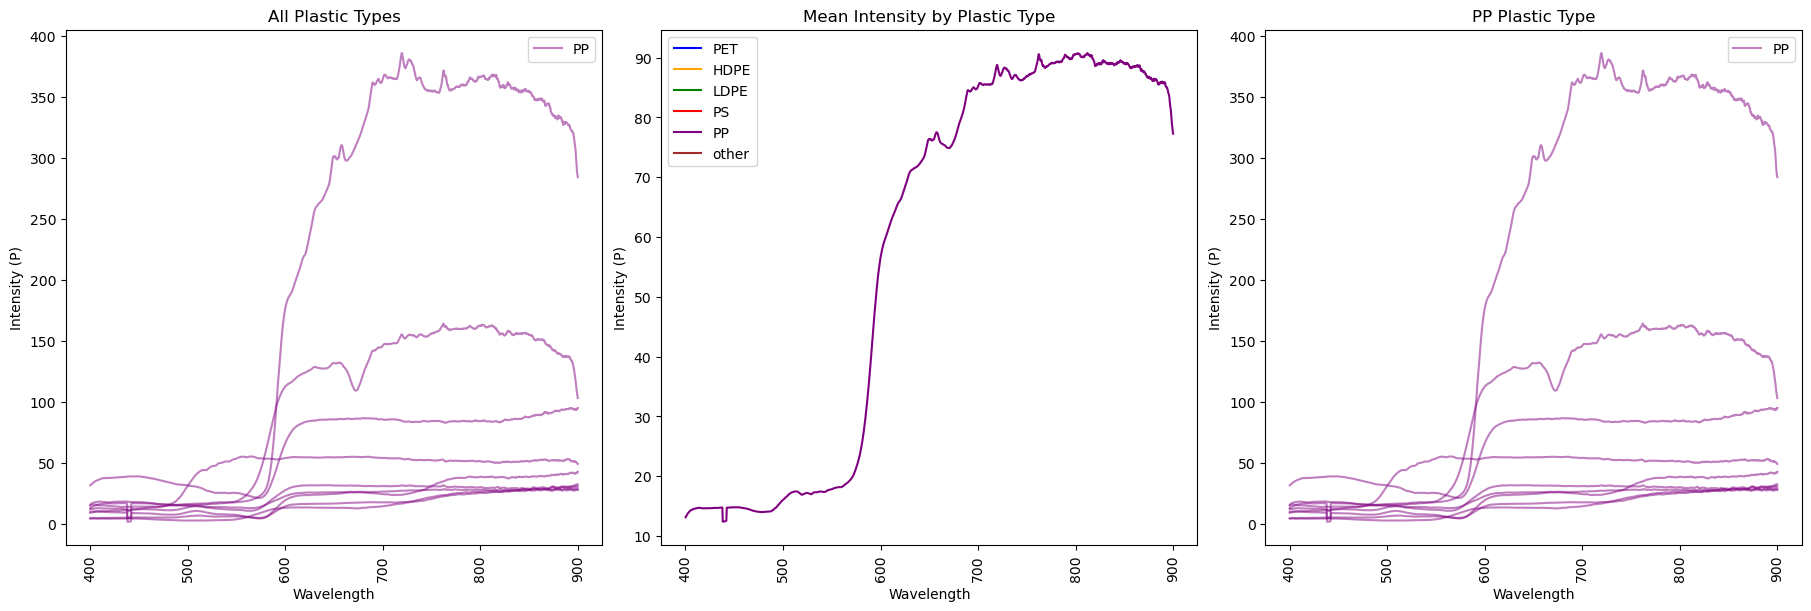

In [18]:
# Create a figure with 1 row and 3 columns of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

# Plot each scenario in a separate subplot
plot_plastic_types(df_merah, ['PET', 'HDPE', 'LDPE', 'PS', 'PP', 'other'], ax=axes[0])
axes[0].set_title('All Plastic Types')
plot_plastic_types(df_merah, ['PET', 'HDPE', 'LDPE', 'PS', 'PP', 'other'], mean_same_type=True, ax=axes[1])
axes[1].set_title('Mean Intensity by Plastic Type')
plot_plastic_types(df_merah, ['PP'], ax=axes[2])
axes[2].set_title('PP Plastic Type')

# Show the plot
plt.show()

# Biru

In [19]:
df_biru = df[df['color'] == 'Biru']
# df_biru

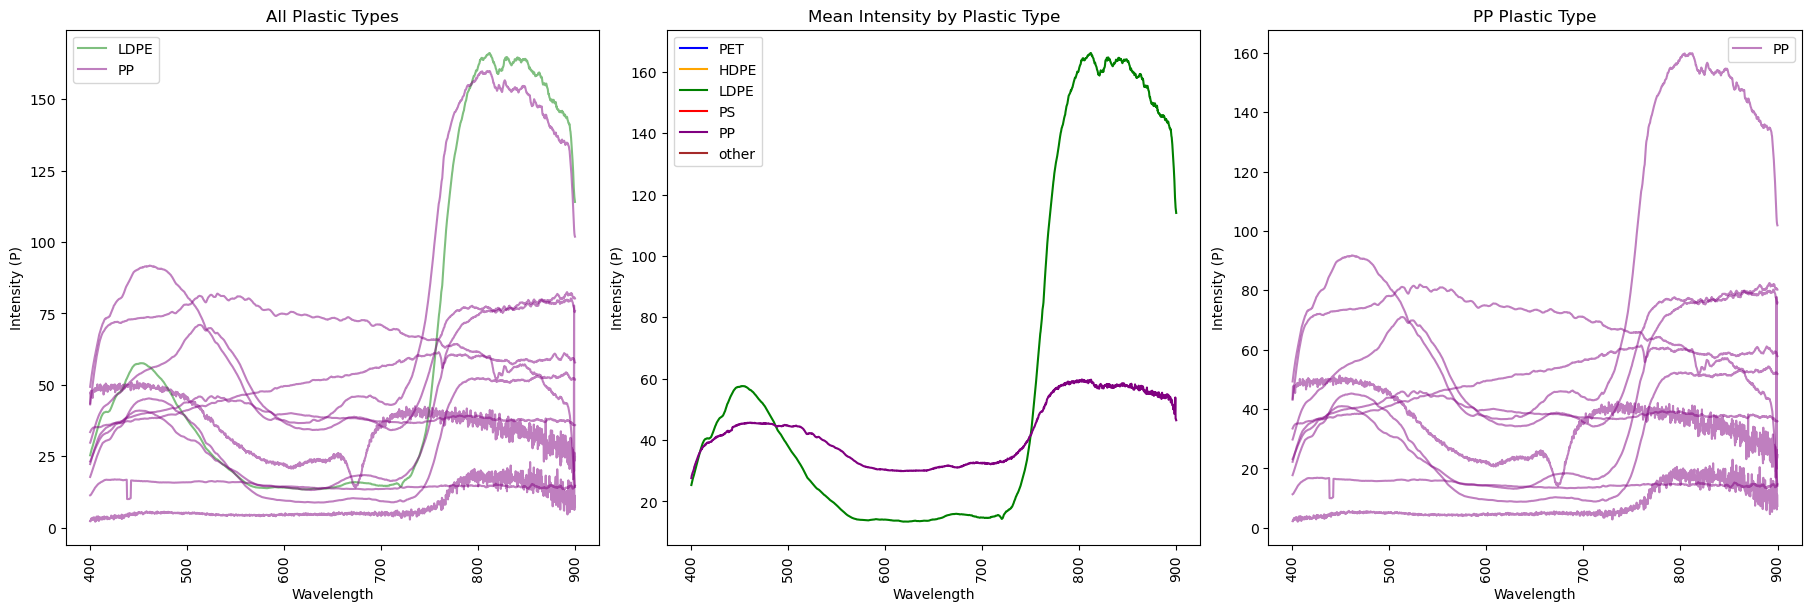

In [20]:
# Create a figure with 1 row and 3 columns of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

# Plot each scenario in a separate subplot
plot_plastic_types(df_biru, ['PET', 'HDPE', 'LDPE', 'PS', 'PP', 'other'], ax=axes[0])
axes[0].set_title('All Plastic Types')
plot_plastic_types(df_biru, ['PET', 'HDPE', 'LDPE', 'PS', 'PP', 'other'], mean_same_type=True, ax=axes[1])
axes[1].set_title('Mean Intensity by Plastic Type')
plot_plastic_types(df_biru, ['PP'], ax=axes[2])
axes[2].set_title('PP Plastic Type')

# Show the plot
plt.show()

# Putih

In [21]:
df_putih = df[df['color'] == 'Putih']
# df_putih

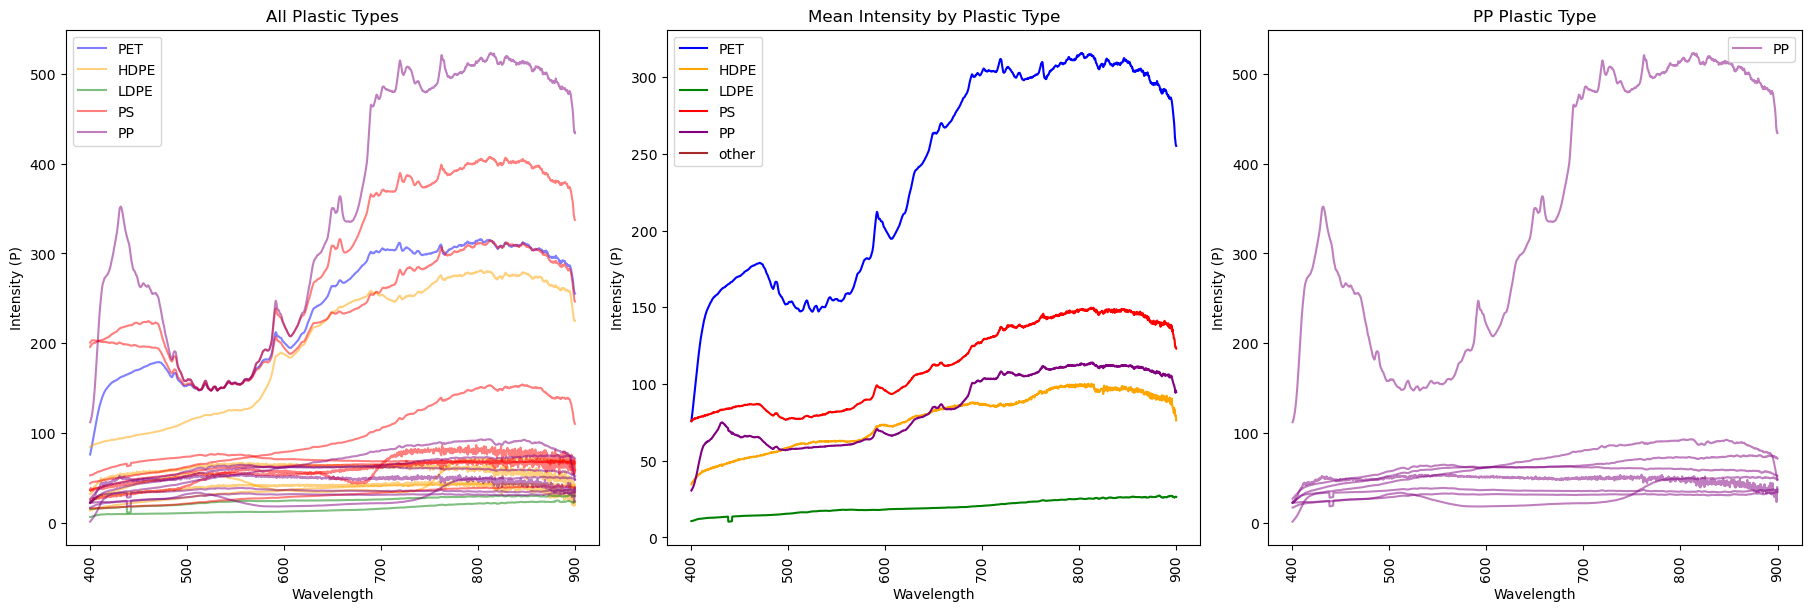

In [22]:
# Create a figure with 1 row and 3 columns of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

# Plot each scenario in a separate subplot
plot_plastic_types(df_putih, ['PET', 'HDPE', 'LDPE', 'PS', 'PP', 'other'], ax=axes[0])
axes[0].set_title('All Plastic Types')
plot_plastic_types(df_putih, ['PET', 'HDPE', 'LDPE', 'PS', 'PP', 'other'], mean_same_type=True, ax=axes[1])
axes[1].set_title('Mean Intensity by Plastic Type')
plot_plastic_types(df_putih, ['PP'], ax=axes[2])
axes[2].set_title('PP Plastic Type')

# Show the plot
plt.show()

# Hitam

In [23]:
df_hitam = df[df['color'] == 'Hitam']
# df_hitam

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


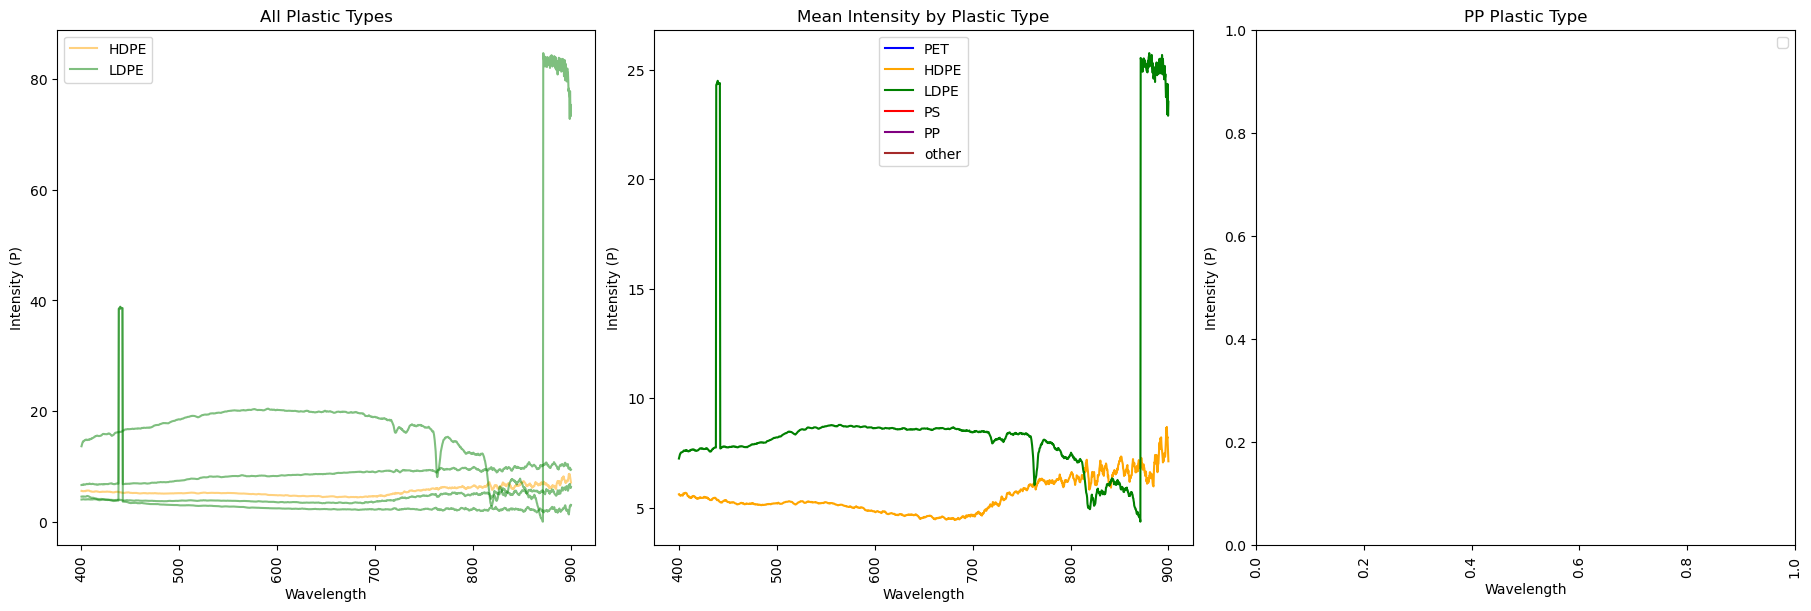

In [24]:
# Create a figure with 1 row and 3 columns of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

# Plot each scenario in a separate subplot
plot_plastic_types(df_hitam, ['PET', 'HDPE', 'LDPE', 'PS', 'PP', 'other'], ax=axes[0])
axes[0].set_title('All Plastic Types')
plot_plastic_types(df_hitam, ['PET', 'HDPE', 'LDPE', 'PS', 'PP', 'other'], mean_same_type=True, ax=axes[1])
axes[1].set_title('Mean Intensity by Plastic Type')
plot_plastic_types(df_hitam, ['PP'], ax=axes[2])
axes[2].set_title('PP Plastic Type')

# Show the plot
plt.show()

# Transparan

In [25]:
df_trans = df[df['color'] == 'Transparan']
# df_trans

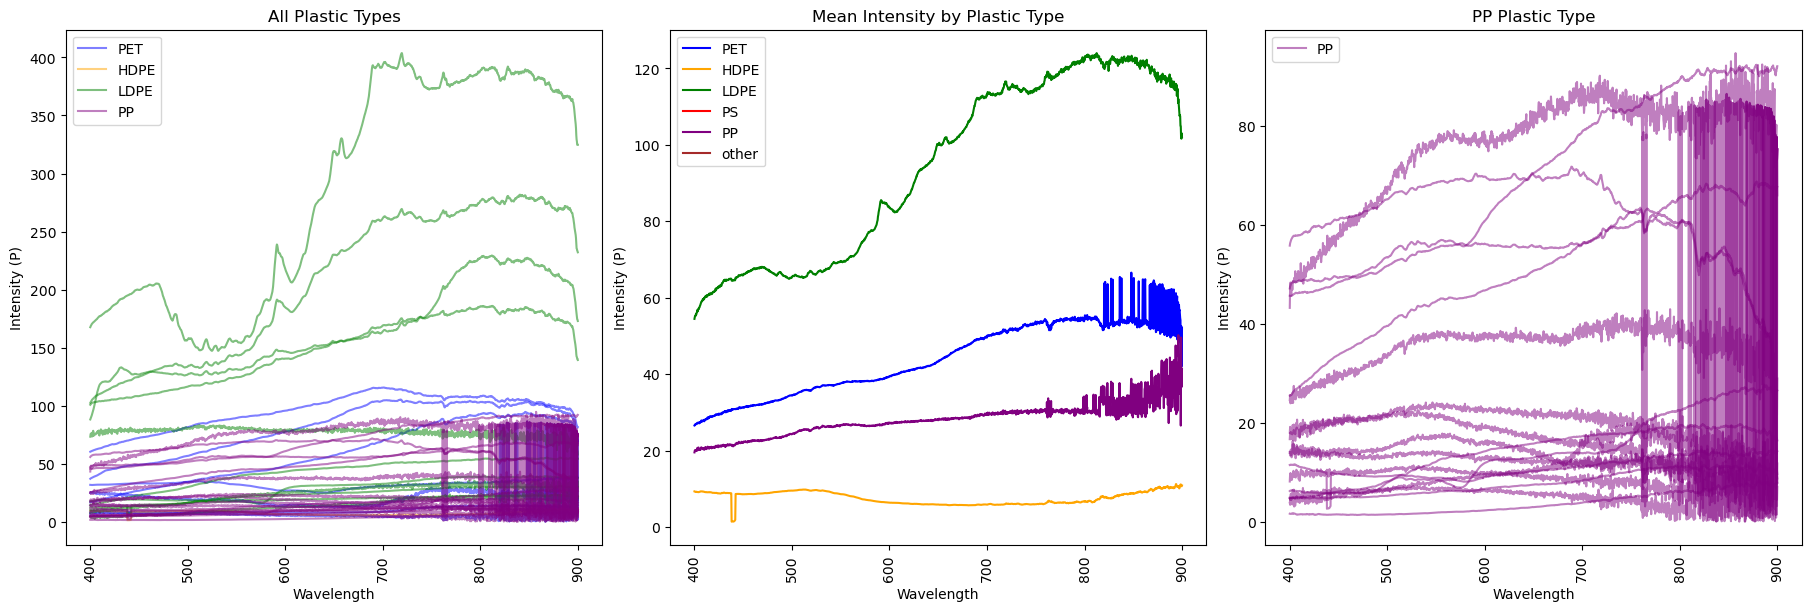

In [26]:
# Create a figure with 1 row and 3 columns of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

# Plot each scenario in a separate subplot
plot_plastic_types(df_trans, ['PET', 'HDPE', 'LDPE', 'PS', 'PP', 'other'], ax=axes[0])
axes[0].set_title('All Plastic Types')
plot_plastic_types(df_trans, ['PET', 'HDPE', 'LDPE', 'PS', 'PP', 'other'], mean_same_type=True, ax=axes[1])
axes[1].set_title('Mean Intensity by Plastic Type')
plot_plastic_types(df_trans, ['PP'], ax=axes[2])
axes[2].set_title('PP Plastic Type')

# Show the plot
plt.show()